<a href="https://colab.research.google.com/github/imcuky/Text-Classification-Empirical-Study-Sentiment-Analysis/blob/main/Text_Classification_Empirical_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Text Classification on a Airline Passenger Reviews Empirical Study - Sentiment Analysis**


   Author: Catherine Lee<br>
catherine.lee.le@gmail.com
<br>

#**Introduction**

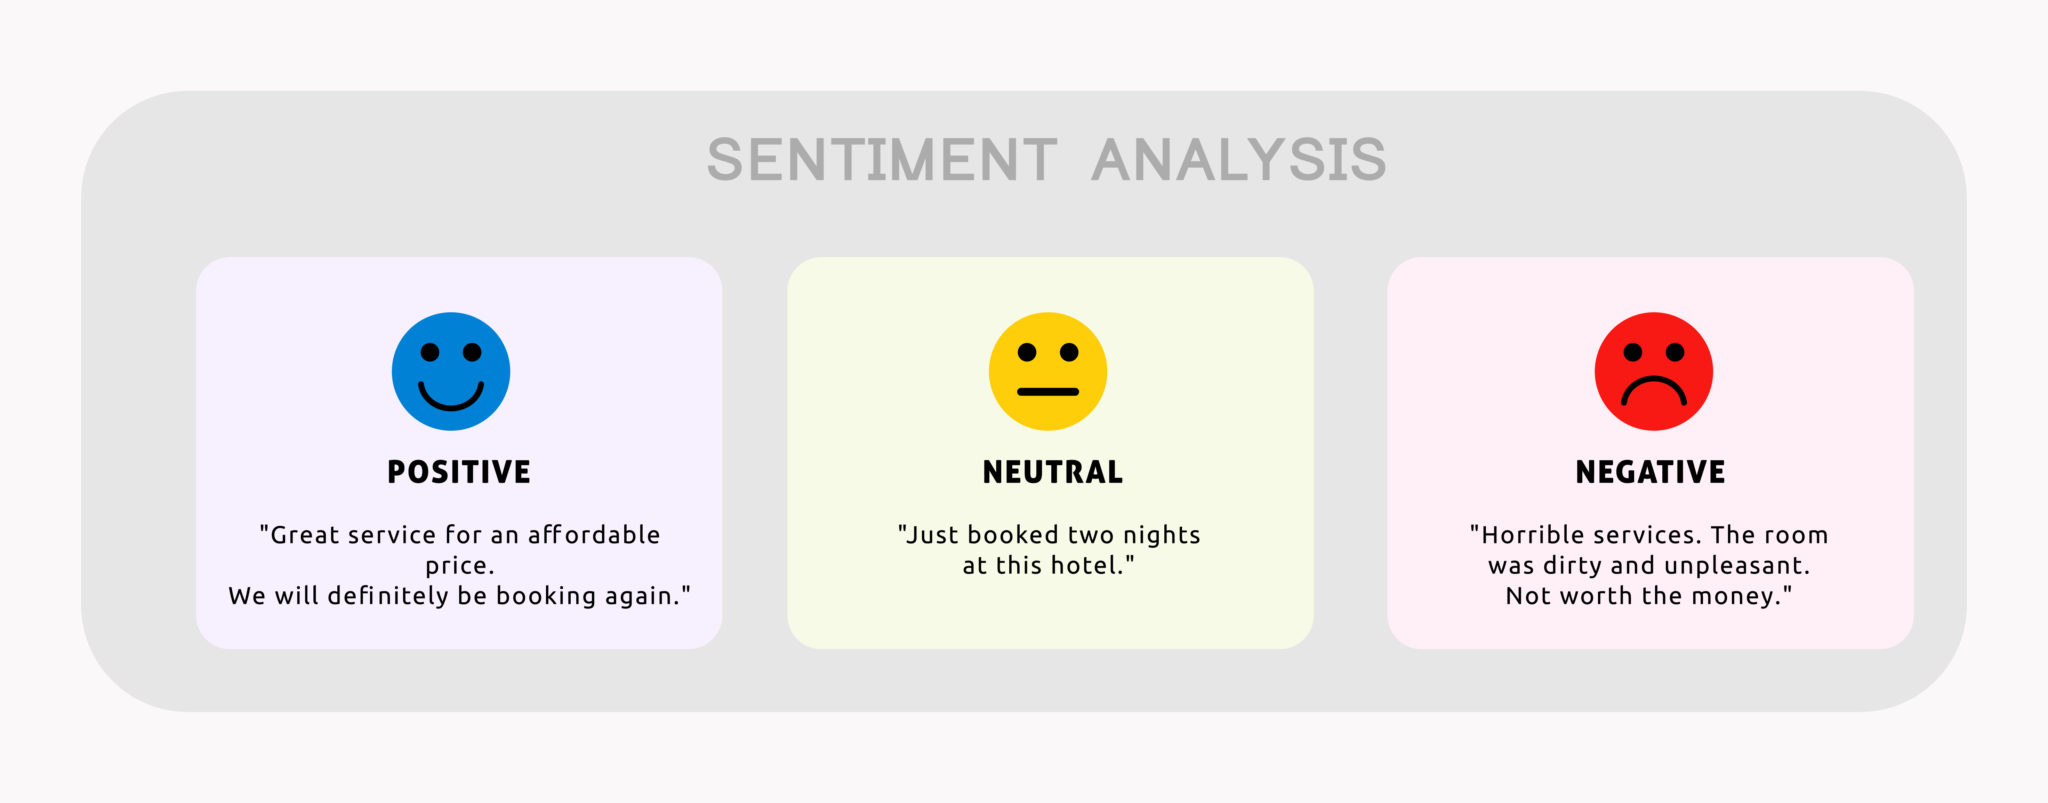

scorce: https://www.analyticsvidhya.com/blog/2022/04/a-comprehensive-overview-of-sentiment-analysis/

Sentiment analysis is a specific case of text classification where the goal is to classify text into sentiment categories (e.g., Positive, Neutral, and Negative).
Sentiment analysis is a natural language processing (NLP) task that involves determining the sentiment expressed in a piece of text, such as "Great service.." for positive, "Horrible services" for negative, or "So-so services.." for neutral. In this text classification empirical study, we will perform broader task that involves assigning predefined categories to text.

# **Text Classification Dataset**

In [ ]:
#let's start by installing spaCy
!pip install spacy
# please ignore the install message

In [ ]:
import spacy
import pandas as pd
import numpy as np

##**The Data set**

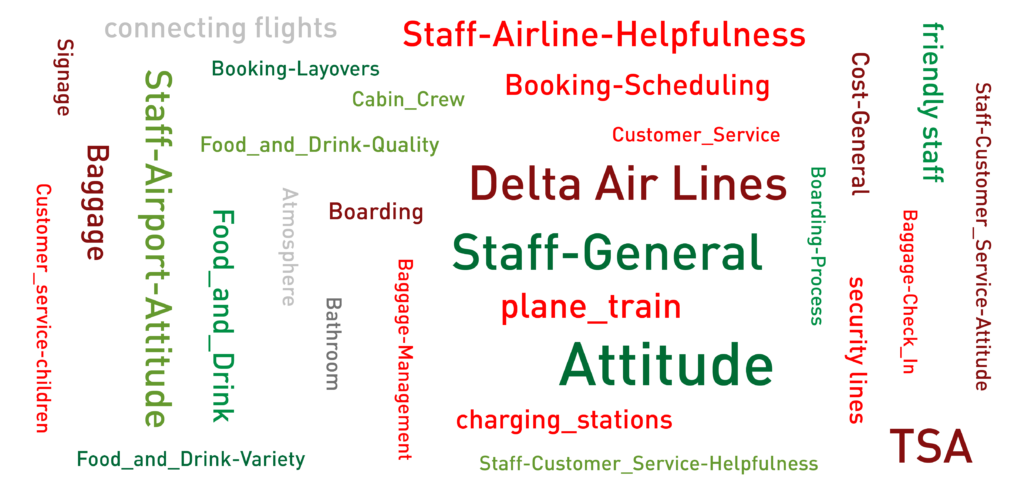

Scourse: https://www.lexalytics.com/blog/analyzing-airport-reviews-using-nlp/

In this Jupyter Notebook, an empirical study is to presented Text Classification on a Airline Passenger Reviews at [Kaggle](https://www.kaggle.com/datasets/malharkhatu/airline-passenger-reviews).

It contains more than 10 thousand samples of historical reviews flight data from real-world airline passenger experiences, which the sentiment analysis models trained on this dataset are more likely to generalize well to real-world scenarios. The reviews are divide by 3 sentiment class (promoters, detractors, and passives).


The primary focus is to obtain the NLP in order to predict the sentiment of the review based on its characteristics. The goal of the task is to set up an experimental classification problem and explore on different derived datasets. Four different models will be used and compared to provide an accurate estimate of a class based on the given information.




In [ ]:
#Load the dataset
url = 'https://raw.githubusercontent.com/imcuky/Datasets/main/reduced_file_AirPassengerReviews.csv'


In [ ]:
data = pd.read_csv(url)

In [ ]:
data.columns

Index(['customer_review', 'NPS Score'], dtype='object')

In [ ]:
pd.set_option('max_colwidth', None)
data.head()

,customer_review,NPS Score
0,"London to Izmir via Istanbul. First time I'd flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff don't speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasn't an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, I'd phoned a TK call centre (based in Ukraine) to pay an extra Â£40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think their cabin crew and planes are very good, ground staff and call centre staff need better training and they all need better computer systems and software to work with.",Passive
1,"Istanbul to Bucharest. We make our check in in the airport, they Take our luggage , we go to the gate and at the gate surprise they dont let uÈ™ board with two children, because they say the flight is overbooked. We had to wait in the airport with two children until 5 oclock in the morning until they bring uÈ™ to a hotel 2 hours far away from the airport without luggage, without eat without nothing. Our first and last flight with this airline.",Detractor
2,"Rome to Prishtina via Istanbul. I flew with this company several times in the past years, and I can honestly say that it is getting worse and worse. I flew from Rome to Prishtina via Istanbul, all 4 flights had a delay (which apparently is pretty normal with Turkish). The ground staff is for the most part useless. In Istambul i have tried to ask a few information about a flight delay (i had just 30 minutes before the connecting flight) and the whole answer was: ""Relax Sir, No problem Sir, It's okay"". The new airport is a gigantic mess, very big and disorganized. When you land in Istanbul it takes about 20 to 25 minutes taxiing and other 10 minutes before they actually start disembarking, it's an exhausting experience especially if you are in a hurry. Forget about asking for some indication at the new airport, they all chat between each other, some with a coffee in their hands. I flew with four different aircraft on this trip, two were fairly new, the other two were old, seats worn. Food on board was of very poor quality.., let me repeat this, very...poor quality. In general i can say that crew is decently trained and deliver a good experience or at least they try, of course it is far from the experience you get flying Qatar or Emirates but still pretty good, while ground personnel, especially in Istanbul is the personification of the word Lazy. A complete disaster. I will try and avoid Turkish Airlines in the future, it is not a cheap company and definitely not worth for the money you pay. If you are in a hurry or you know you will be avoid this company and avoid the new istanbul airport at all costs.",Detractor
3,"Flew on Turkish Airlines IAD-IST-KHI and return KHI-IST-IAD. Turkish Airlines has consistently maintained its quality since I first flew with them in 2007. The flights leave on time, the catering is excellent, the inflight entertainment is extensive and the interface easy to use, and the cabin crew is excellent. Interesting though the A330 on the KHI-IST route and return seemed to have more leg room and was newer than the A330 on the IAD-IST route which was showing its age. The A330 on the IAD-IST route had a slow responding interface for the inflight entertainment and a broken table on the return flight. But Turkish Airlines will be replacing the A330 on its flight to IAD with the 787 sometime in the summer. Turkish food was

#**Define Derived Datasets**

The derived dataset is an screened version of the original Airline Passenger Reviews dataset, incorporating named entities (NE) and/or Part-of-speech (POS) features to facilitate a more comprehensive analysis. The derived dataset aims to provide a more detailed and foundation for sentiment analysis. The inclusion of named entities and POS tags enables the extraction of specific information related to linguistic features that contribute to sentiment.

In [ ]:
#create empty dataframes that will store the derived datasets

# include only nouns, or only verbs, or only adjectives, or some combinations of those.
derived_dataset1 = pd.DataFrame(columns = ['pos', 'Class'])

# named entities found in the text + some POS
derived_dataset2 = pd.DataFrame(columns = ['pos-np', 'Class'])

**NLP pipeline**

This is where you create the NLP pipeline. load() will download the correct model (English).

<img src = 'https://user-images.githubusercontent.com/13643239/55229632-dbff9480-521d-11e9-8499-efb2a9c948db.png'>

Source: https://www.datacamp.com/cheat-sheet/spacy-cheat-sheet-advanced-nlp-in-python

In [ ]:
nlp = spacy.load("en_core_web_sm")

Applying the pipeline to every sentences creates a Document where every word is a Token object.

Doc: https://spacy.io/api/doc

Token: https://spacy.io/api/token

In [ ]:
#Apply nlp pipeline to the column that has your sentences.
# data = data.head(1000)
data['tokenized'] = data['customer_review'].apply(nlp)

**Original dataset**

In [ ]:
data.head()

,customer_review,NPS Score,tokenized
0,"London to Izmir via Istanbul. First time I'd flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff don't speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasn't an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, I'd phoned a TK call centre (based in Ukraine) to pay an extra Â£40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think their cabin crew and planes are very good, ground staff and call centre staff need better training and they all need better computer systems and software to work with.",Passive,"( , London, to, Izmir, via, Istanbul, ., First, time, I, 'd, flown, TK, ., I, found, them, very, good, in, the, air, ,, cabin, crew, ,, planes, ,, food, ,, all, very, nice, ., Not, so, great, on, the, ground, ,, ground, staff, ,, call, centre, ,, computer, systems, ., My, flight, from, LHR, was, delayed, so, I, missed, the, connection, in, Istanbul, ., Most, ground, staff, do, n't, speak, English, ,, and, I, was, given, contradictory, instructions, from, those, that, could, speak, a, little, English, ., I, eventually, got, on, a, flight, to, Izmir, three, hours, later, ,, but, ...)"
1,"Istanbul to Bucharest. We make our check in in the airport, they Take our luggage , we go to the gate and at the gate surprise they dont let uÈ™ board with two children, because they say the flight is overbooked. We had to wait in the airport with two children until 5 oclock in the morning until they bring uÈ™ to a hotel 2 hours far away from the airport without luggage, without eat without nothing. Our first and last flight with this airline.",Detractor,"( , Istanbul, to, Bucharest, ., We, make, our, check, in, in, the, airport, ,, they, Take, our, luggage, ,, we, go, to, the, gate, and, at, the, gate, surprise, they, do, nt, let, uÈ, ™, board, with, two, children, ,, because, they, say, the, flight, is, overbooked, ., We, had, to, wait, in, the, airport, with, two, children, until, 5, oclock, in, the, morning, until, they, bring, uÈ, ™, to, a, hotel, 2, hours, far, away, from, the, airport, without, luggage, ,, without, eat, without, nothing, ., Our, first, and, last, flight, with, this, airline, .)"
2,"Rome to Prishtina via Istanbul. I flew with this company several times in the past years, and I can honestly say that it is getting worse and worse. I flew from Rome to Prishtina via Istanbul, all 4 flights had a delay (which apparently is pretty normal with Turkish). The ground staff is for the most part useless. In Istambul i have tried to ask a few information about a flight delay (i had just 30 minutes before the connecting flight) and the whole answer was: ""Relax Sir, No problem Sir, It's okay"". The new airport is a gigantic mess, very big and disorganized. When you land in Istanbul it takes about 20 to 25 minutes taxiing and other 10 minutes before they actually start disembarking, it's an exhausting experience especially if you are in a hurry. Forget about asking for some indication at the new airport, they all chat between each other, some with a coffee in their hands. I flew with four different aircraft on this trip, two were fairly new, the other two were old, seats worn. Food on board was of very poor quality.., let me repeat this, very...poor quality. In general i can say that crew is decently trained and deliver a good experience or at least they try, of course it is far from the experi

**Derived-Dataset-1**

Derived-Dataset-1 focuse a subset of the POS (Part-of-Speech) tags that can comprehensive understanding of passenger sentiments in airline reviews.


**`ADJ (Adjective)`**

  > "...The experience was very **nice**..." - *Promoter*

  > "...**Terrible** experience and **terrible** customer service! Will never fly again..." - *Detractor*

  > "...The crew was very **efficient** and **helpful**..." - *Promoter*

Adjectives help us to analyze and understand the specific aspects of airline experiences that passengers find positive or negative. For instance, identifying adjectives like **terrible** or **nice** can reveal the sentiment associated with different facets of the journey. To illustrate, a promoter might describe their experience as **nice** while a detractor could use **terrible** to describe their experience and customer service. Lastly, adjectives can provide more detailed information on certain aspects of the journey, such as the crew being **efficient** and **helpful**.


**`ADV (Adverb):`**

  > "...Will **never** fly again..." - *Detractor*

  > "..Flown with this airline twice this month and both experiences were **very** good.." - *Promoter*


Analyzing adverbs can help us to understand the nuances of passenger experiences. For example, adverbs such as **never** or **very** can indicate the consistency or infrequency of certain events, contributing to a more nuanced sentiment analysis. By capturing these nuances, we can gain a deeper understanding of passenger experiences tone.


**`VERB (Verbs):`**

> " ...They do not **care** for any for your time loss..." - *Detractor*


> "...When I arrived in Istanbul at 10pm we are **informed** that [...] is **delayed** 4,5 hours..." - *Detractor*


> "...I liked the service and **enjoyed** the flight..." - *Promoter*

Verbs provide insights into the activities or events shaping passenger opinions. For example, analyzing verbs like **delayed** or **enjoyed** can help understand events and experiences, such as the flight's departure, boarding process, baggage, and staff's demeanor, which reveal specific events that contribute to positive or negative sentiments.

In [ ]:
def get_pos(sentence, wanted_pos): #wanted_pos refers to the desired pos tagging
    pos = []
    #for each token in sentence
    for token in sentence:
        if token.pos_ in wanted_pos:
          # store the Lemmatizationof the token
            pos.append(token.lemma_) # lemma returns a number. lemma_ return a string
    return ' '.join(pos) # return value is as a string and not a list for countVectorizer

In [ ]:
#As an example, we use the above function to fetch all the verbs. We store this information in our first derived dataset
derived_dataset1['pos'] = data['tokenized'].apply(lambda sent : get_pos(sent, ['ADJ', 'ADV', 'VERB']))
derived_dataset1['Class'] = data['NPS Score']

In [ ]:
derived_dataset1.head() # pos include all the POS in the sentence

,pos,Class
0,first fly find very good very nice so great delay so miss Most speak give contradictory speak little eventually get later easy make bad vast have walk cavernous new also phone base pay extra Â£40 so extra however keep change keep change give extra luckily be spare sort overall think very good need well need well work,Passive
1,make take go let ™ say overbooke have wait bring far away first last,Detractor
2,fly several past honestly say get bad bad fly have apparently pretty normal most useless try ask few just connect whole relax okay new gigantic very big disorganized land take about taxi other actually start disembarking exhausting especially forget ask new chat other fly different fairly new other old wear very poor let repeat very poor general say decently train deliver good least try far get fly still pretty good especially complete try avoid cheap definitely worth pay know avoid avoid new,Detractor
3,return consistently maintain first fly leave excellent inflight extensive easy use excellent interesting seem have more new show have slow respond inflight broken replace turkish serve personally like see help elderly walk nice overall wonderful,Promoter
4,never turkish travel get have other straight forward ask stay care make keep wait more,Detractor


**Derived-Dataset-2**

Derived-Dataset-2 focuse on specific Name Entities (NE) and some POS tags. In the given reviews, various types of named entities can be identified. Understanding and extracting information related to these named entities can be helpful in sentiment analysis.



**Named Entities:**

**`PERSON - People, including fictional.`**

   > "..**Cabin crew** were really friendly on both legs.." - Promoter

   > "...**Cabin crew** were friendly and efficient.." - Promoter

Mentions of specific individuals or groups of people can provide insights into the reviewer's experience with the different staff, influencing sentiments. For example the mention of **cabin crew**, provide direct insights into the reviewer's experience with the airline staff.


**`FAC - Buildings, airports, highways, bridges, etc.`**

   > "...Never book **Turkish airlines** if you are traveling to Dublin from Mumbai..." - *Detractor*


References to facilities such as airports or specific locations can understanding sentiments related to the airline's services.
For example, the mention of the airline is crucial for understanding the context of the review. It directly relates to the airline services being evaluated by the passenger. The choice of airline can influence a passenger's overall experience. Whether positive or negative, sentiments associated with **Turkish Airlines** provide valuable insights into the reviewer's perception of the airline.



**`TIME - Times smaller than a day.`**
  
  > "..which really is unacceptable for flights of **seven to eight hours**.." - Detractor
  
Timing information, such as the duration of the flight, provides context to the reviewer's experience. Delays or other issues during long flights can influence sentiments.


**POS:**

**`ADJ (Adjective)`**

combining adjectives (ADJ) with named entities adds depth to the understanding of reviews.

  > "..**Cabin crew** were really **friendly** on both legs.." - Promoter

   > "...**Cabin crew** were **friendly** and **efficient**.." - Promoter

   > "The **staff** were very **friendly** and **attentive**" - Promoter
  
Positive adjectives like **friendly,** "attentive," and **efficient** associated with the named entity cabin crew and staff contribute to a positive sentiment regarding the airline staff.

  > "I will never book with **Delta** again! Very **unprofessional**. So upset that we have been in the airport for five hours already!" - Detractor
  
  > "..**Delta** is **incompetent**..." - Detractor


Negative adjectives like **unprofessional** and incompetent linked with the named entity Delta Airlines express dissatisfaction and contribute to a negative sentiment.

In [ ]:
def get_ent(sentence, wanted_ents, wanted_pos):
    entity = []
    #for each token in sentence
    for token in sentence:
        # check the entity type or the pos type
        # if either type
        if (token.ent_type_ in wanted_ents) or (token.pos_ in wanted_pos):

            entity.append(token.lemma_)

    return ' '.join(entity)


In [ ]:
#fetch the desired name entities and pos taggings for the second derived dataset
derived_dataset2['pos-np'] = data['tokenized'].apply(lambda sent : get_ent(sent, ['PERSON', 'FAC', 'TIME'], ['ADJ']))
derived_dataset2['Class'] = data['NPS Score']

In [ ]:
derived_dataset2.head()

,pos-np,Class
0,Izmir first good nice great Most contradictory little three hour later easy bad vast cavernous new extra extra extra spare good well well,Passive
1,the morning 2 hour first last,Detractor
2,several past bad bad normal most useless few just 30 minute whole okay new gigantic big disorganized about 20 to 25 minute other 10 minute disembarking exhausting new other different new other old poor poor general good least good complete cheap worth new,Detractor
3,excellent inflight extensive easy excellent interesting more new slow inflight broken turkish elderly nice wonderful,Promoter
4,turkish other more than 3 hour,Detractor


#**Classification Empirical Study**

Import necessary libraries

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


##1.Encode the text as input features with associated values

###**i. Data cleaning**

Data cleaning typically involves removing stop words and lowering the case.

In [ ]:
import re

In [ ]:

# stopwords from spacy
stop_words = list(nlp.Defaults.stop_words)

def text_cleaning(text, sop = 1):
  result = text.lower()
  # remove the punctuations
  result = re.sub('[,.()]?', '', result)

  words = result.split()

  # remove stop words
  new_words = [word for word in words if word not in stop_words]

  result = ' '.join([word for word in new_words])

  return result

data['cleaned_text'] = data['customer_review'].apply(lambda sent: text_cleaning(sent))
derived_dataset1['cleaned_text'] = derived_dataset1['pos'].apply(lambda sent: text_cleaning(sent))
derived_dataset2['cleaned_text'] = derived_dataset2['pos-np'].apply(lambda sent: text_cleaning(sent))

In [ ]:
data.head()

,customer_review,NPS Score,tokenized,cleaned_text
0,"London to Izmir via Istanbul. First time I'd flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff don't speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasn't an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, I'd phoned a TK call centre (based in Ukraine) to pay an extra Â£40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think their cabin crew and planes are very good, ground staff and call centre staff need better training and they all need better computer systems and software to work with.",Passive,"( , London, to, Izmir, via, Istanbul, ., First, time, I, 'd, flown, TK, ., I, found, them, very, good, in, the, air, ,, cabin, crew, ,, planes, ,, food, ,, all, very, nice, ., Not, so, great, on, the, ground, ,, ground, staff, ,, call, centre, ,, computer, systems, ., My, flight, from, LHR, was, delayed, so, I, missed, the, connection, in, Istanbul, ., Most, ground, staff, do, n't, speak, English, ,, and, I, was, given, contradictory, instructions, from, those, that, could, speak, a, little, English, ., I, eventually, got, on, a, flight, to, Izmir, three, hours, later, ,, but, ...)",london izmir istanbul time i'd flown tk found good air cabin crew planes food nice great ground ground staff centre computer systems flight lhr delayed missed connection istanbul ground staff don't speak english given contradictory instructions speak little english eventually got flight izmir hours later wasn't easy process worse vast distances walk gates cavernous new airport i'd phoned tk centre based ukraine pay extra â£40 way extra leg room seats departure times kept changing seats kept changing return leg london istanbul given extra leg room seat luckily spare exit row seat cabin crew sorted overall think cabin crew planes good ground staff centre staff need better training need better computer systems software work
1,"Istanbul to Bucharest. We make our check in in the airport, they Take our luggage , we go to the gate and at the gate surprise they dont let uÈ™ board with two children, because they say the flight is overbooked. We had to wait in the airport with two children until 5 oclock in the morning until they bring uÈ™ to a hotel 2 hours far away from the airport without luggage, without eat without nothing. Our first and last flight with this airline.",Detractor,"( , Istanbul, to, Bucharest, ., We, make, our, check, in, in, the, airport, ,, they, Take, our, luggage, ,, we, go, to, the, gate, and, at, the, gate, surprise, they, do, nt, let, uÈ, ™, board, with, two, children, ,, because, they, say, the, flight, is, overbooked, ., We, had, to, wait, in, the, airport, with, two, children, until, 5, oclock, in, the, morning, until, they, bring, uÈ, ™, to, a, hotel, 2, hours, far, away, from, the, airport, without, luggage, ,, without, eat, without, nothing, ., Our, first, and, last, flight, with, this, airline, .)",istanbul bucharest check airport luggage gate gate surprise dont let uè™ board children flight overbooked wait airport children 5 oclock morning bring uè™ hotel 2 hours far away airport luggage eat flight airline
2,"Rome to Prishtina via Istanbul. I flew with this company several times in the past years, and I can honestly say that it is getting worse and worse. I flew from Rome to Prishtina via Istanbul, all 4 flights had a delay (which apparently is pretty normal with Turk

In [ ]:
derived_dataset1.head()

,pos,Class,cleaned_text
0,first fly find very good very nice so great delay so miss Most speak give contradictory speak little eventually get later easy make bad vast have walk cavernous new also phone base pay extra Â£40 so extra however keep change keep change give extra luckily be spare sort overall think very good need well need well work,Passive,fly find good nice great delay miss speak contradictory speak little eventually later easy bad vast walk cavernous new phone base pay extra â£40 extra change change extra luckily spare sort overall think good need need work
1,make take go let ™ say overbooke have wait bring far away first last,Detractor,let ™ overbooke wait bring far away
2,fly several past honestly say get bad bad fly have apparently pretty normal most useless try ask few just connect whole relax okay new gigantic very big disorganized land take about taxi other actually start disembarking exhausting especially forget ask new chat other fly different fairly new other old wear very poor let repeat very poor general say decently train deliver good least try far get fly still pretty good especially complete try avoid cheap definitely worth pay know avoid avoid new,Detractor,fly past honestly bad bad fly apparently pretty normal useless try ask connect relax okay new gigantic big disorganized land taxi actually start disembarking exhausting especially forget ask new chat fly different fairly new old wear poor let repeat poor general decently train deliver good try far fly pretty good especially complete try avoid cheap definitely worth pay know avoid avoid new
3,return consistently maintain first fly leave excellent inflight extensive easy use excellent interesting seem have more new show have slow respond inflight broken replace turkish serve personally like see help elderly walk nice overall wonderful,Promoter,return consistently maintain fly leave excellent inflight extensive easy use excellent interesting new slow respond inflight broken replace turkish serve personally like help elderly walk nice overall wonderful
4,never turkish travel get have other straight forward ask stay care make keep wait more,Detractor,turkish travel straight forward ask stay care wait


In [ ]:
derived_dataset2.head()

,pos-np,Class,cleaned_text
0,Izmir first good nice great Most contradictory little three hour later easy bad vast cavernous new extra extra extra spare good well well,Passive,izmir good nice great contradictory little hour later easy bad vast cavernous new extra extra extra spare good
1,the morning 2 hour first last,Detractor,morning 2 hour
2,several past bad bad normal most useless few just 30 minute whole okay new gigantic big disorganized about 20 to 25 minute other 10 minute disembarking exhausting new other different new other old poor poor general good least good complete cheap worth new,Detractor,past bad bad normal useless 30 minute okay new gigantic big disorganized 20 25 minute 10 minute disembarking exhausting new different new old poor poor general good good complete cheap worth new
3,excellent inflight extensive easy excellent interesting more new slow inflight broken turkish elderly nice wonderful,Promoter,excellent inflight extensive easy excellent interesting new slow inflight broken turkish elderly nice wonderful
4,turkish other more than 3 hour,Detractor,turkish 3 hour


###**ii. Spilt the data set into Training data and Test data**


It's often challenging to obtain a realistic test dataset to evaluate the model's performance. Nonetheless, validation can be employed to split the data sample into training and testing sets. The original sample data can be divided into two portions, namely the training and test data. Subsequently, the model can be trained using the training data and evaluated using the test data to determine its performance.
The accuracy, precision, and recall metrics will be computed across the test data to evaluate the model's performance.

Split the data such that 70% is used for training set and 30% is used for testing set.

Recall that we do not use this test set when building the model, only the training set.

In [ ]:
temp_1 = data
temp_2 = derived_dataset1
temp_3 = derived_dataset2

In [ ]:
X_1, X_test_1, y_1,y_test_1 = train_test_split(temp_1['cleaned_text'].values, temp_1['NPS Score'].values, test_size=0.3, random_state=100)

X_2, X_test_2, y_2, y_test_2 = train_test_split( temp_2['cleaned_text'].values,temp_2['Class'].values, test_size=0.3, random_state=100)

X_3,  X_test_3, y_3, y_test_3 = train_test_split(temp_3['cleaned_text'].values, temp_3['Class'].values, test_size=0.3, random_state=100)

###**iii. bag of words with TfidfVectorizer**

We will be using "bag of words" to let each word becomes an independent feature. Briefly, we segment each text  into words, and count the number of times each word occurs in each document.

TfidfVectorizer, on the other hand, use the based on the bag of words model, but after counting the number of times each word occures, it calclate the number of times a word appears in a text, which is term frequency (TF). Inverse Document Frequency (IDF) of a word is calculated as the logarithm of
the total number of documents divided by the total number of times this word appears in the documents.



<img src = "https://mlwhiz.com/images/tfidf.png">

Source: https://mlwhiz.com/blog/2019/02/08/deeplearning_nlp_conventional_methods/

Since each dataset contains different vocabularies after applying specific POS and NE, their corresponding TF-IDF representations will be based on their own vocabularies. We will use 3 different `TfidfVectorizer`.

In [ ]:
tfidf_1 = TfidfVectorizer()
tfidf_2 = TfidfVectorizer()
tfidf_3 = TfidfVectorizer()

We will used `transform` to transform a set of vocabulary and idf values learned from the `fit_transform` without learning new vocabulary.
  


In [ ]:
X_1 = tfidf_1.fit_transform(X_1)
X_test_1 = tfidf_1.transform(X_test_1)


X_2 = tfidf_2.fit_transform(X_2)
X_test_2 = tfidf_2.transform(X_test_2)


X_3 = tfidf_3.fit_transform(X_3)
X_test_3 = tfidf_3.transform(X_test_3)

In [ ]:
X_test_1.shape

(3229, 18910)

In [ ]:
X_test_2.shape

(3229, 6351)

In [ ]:
X_test_3.shape

(3229, 4557)

## 2.Define 2 models using some default parameters


> Increase the Maximum iterations to 5000 in order to let the model to finish converged the optimization.

In [ ]:
# Logistic Regression Model
ModelLR = LogisticRegression(max_iter=5000)
ModelLR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Multilayer Perceptron Model
ModelMLP = MLPClassifier(max_iter=5000)
ModelMLP.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 5000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## 3.Train/test/evaluate the 2 models(that have default parameters) on the 3 datasets.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score,   precision_recall_curve
from sklearn.utils.multiclass import unique_labels

###a. Defines 4-fold

To evaluate the performance of a model, we will utilize a 4-fold cross-validation technique, which involves dividing the data sample into four equal parts or 'folds'. During each iteration of cross-validation, three folds will be used for training the model, while the remaining one will be used for testing (validation set). The accuracy will be calculated across the test data to assess the model's performance.

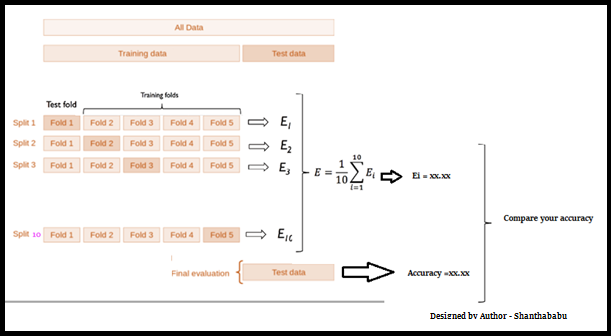

Source: https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/

In [ ]:
# Define the 4-Folds cross-validator without shuffle the samples before applying 4-fold
kfold = KFold(n_splits=4, shuffle=False)

# An array that store the accuracy for each test
accuracy = []

def train(model, X, y):
  '''
    The train function train the model using 4-fold cross-validation.
    Perform the cross-validation 4 times with each time splitting the data into 4 folds,
    3 folds (3/4 of the data) are use to train and 1 fold (1/4 of the data) is use to test.
    Each time it will use a different fold for validation set.

    Parameters
    ----------
    model: The learning model that function is going to train using the 4-fold.

    X: The dataframe that contains the features for each sample

    y: The array that contains the class for each sample

    Returns
    ----------
    The average accuracy of the 4-fold on validation set

  '''

  # the 'train_index' contains the index rows for train fold that we are using to train our model
  # the 'val_index' contains the index rows for validation sets that we are using to test our model
  for train_index, val_index in kfold.split(X):

      # X_train contains the features data for trainings and y_train contains the class for the trainings
      X_train, y_train = X[train_index], y[train_index]

      # X_train contains the features data for validation set and y_train contains the class for the testing
      X_val, y_val = X[val_index], y[val_index]

      # Fit the model with the train fold
      model.fit(X_train, y_train)

      # Evaluate the model using the test fold
      y_pred = model.predict(X_val)

      # Get the accuracy for the current fold
      acc = accuracy_score(y_val, y_pred)

      # Append the result into an array
      accuracy.append(acc)

  # Calculate the accuracy for all the folds
  return sum(accuracy) / len(accuracy)

###i. Logistic Regression Model

**Original dataset**

***Training***

In [ ]:
ave_accuracy_lr_1 = train(ModelLR, X_1, y_1) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_lr_1) # print average accuracy

Average accuracy: 0.7813329792883696


***Testing***

In [ ]:
y_pred_lr_1 = ModelLR.predict(X_test_1) # evaluate the model using test set
cm = confusion_matrix(y_test_1, y_pred_lr_1) # define a confusion matrix on the result

In [ ]:
accuracy_lr = accuracy_score(y_test_1, y_pred_lr_1) # the overall accuracy score on test set
accuracy_lr

0.7822855373180552

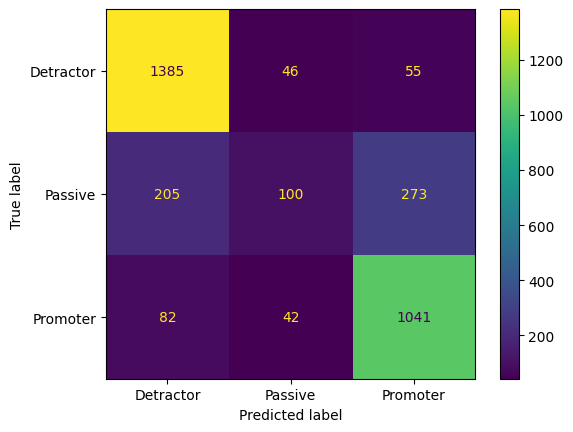

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelLR.classes_)
disp.plot()



```

```



**Derived-Dataset-1**

***Training***

In [ ]:
ave_accuracy_lr_2 = train(ModelLR, X_2, y_2) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_lr_2) # print average accuracy

Average accuracy: 0.7818640467339353


***Testing***

In [ ]:
y_pred_lr_2 = ModelLR.predict(X_test_2) # evaluate the model using test set

In [ ]:
accuracy_lr = accuracy_score(y_test_2, y_pred_lr_2) # the overall accuracy score on test set
accuracy_lr

0.7875503251780737

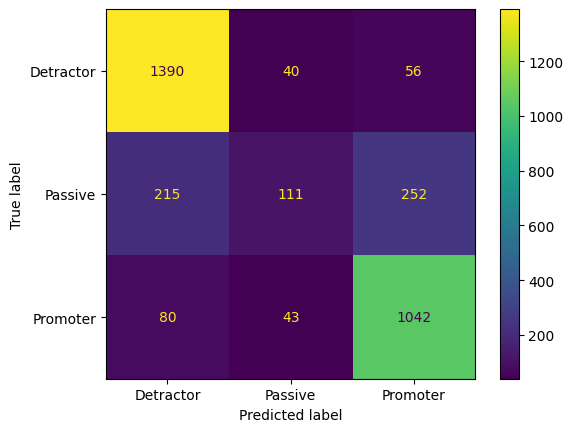

In [ ]:
cm = confusion_matrix(y_test_2, y_pred_lr_2) # define a confusion matrix on the result
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelLR.classes_)
disp.plot()



```

```



**Derived-Dataset-2**

***Training***

In [ ]:
ave_accuracy_lr_3 = train(ModelLR, X_3, y_3) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_lr_3) # print average accuracy

Average accuracy: 0.7761550716941051


***Testing***

In [ ]:
y_pred_lr_3 = ModelLR.predict(X_test_3) # evaluate the model using test set

In [ ]:
accuracy_lr = accuracy_score(y_test_3, y_pred_lr_3) # the overall accuracy score on test set
accuracy_lr

0.7627748528956333

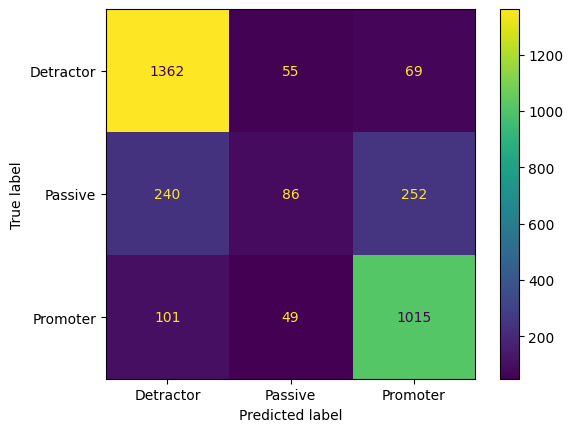

In [ ]:
cm = confusion_matrix(y_test_3, y_pred_lr_3) # define a confusion matrix on the result
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelLR.classes_)
disp.plot()

###**ii.  Multilayer Perceptron Model**

**Original dataset**

***Training***

In [ ]:
ave_accuracy_mlp_1 = train(ModelMLP, X_1, y_1) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_mlp_1) # print average accuracy

Average accuracy: 0.7736325013276686


***Testing***

In [ ]:
y_pred_mlp_1 = ModelMLP.predict(X_test_1) # evaluate the model using test set
accuracy_mlp = accuracy_score(y_test_1, y_pred_mlp_1) # the overall accuracy score on test set
accuracy_mlp

0.7649427067203468

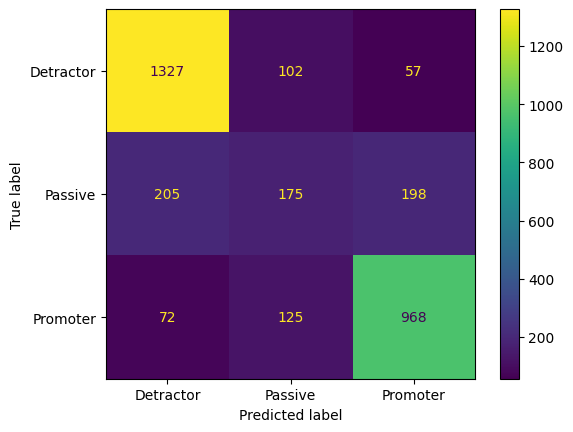

In [ ]:
cm = confusion_matrix(y_test_1, y_pred_mlp_1) # define a confusion matrix on the result
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelMLP.classes_)
disp.plot()



```
```



**Derived-Dataset-1**

***Training***

In [ ]:
ave_accuracy_mlp_2 = train(ModelMLP, X_2, y_2) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_mlp_2) # print average accuracy

Average accuracy: 0.7646574614976103


***Testing***

In [ ]:
y_pred_mlp_2 = ModelMLP.predict(X_test_2) # evaluate the model using test set
accuracy_mlp_2 = accuracy_score(y_test_2, y_pred_mlp_2) # the overall accuracy score on test set
accuracy_mlp_2

0.7178693093837101

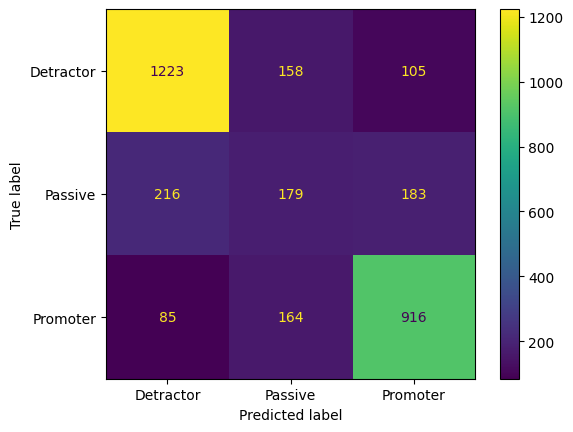

In [ ]:
cm = confusion_matrix(y_test_2, y_pred_mlp_2) # define a confusion matrix on the result
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelMLP.classes_)
disp.plot()



```
```



**Derived-Dataset-2**

***Training***

In [ ]:
ave_accuracy_mlp_3 = train(ModelMLP, X_3, y_3) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_mlp_3) # print average accuracy

Average accuracy: 0.7529429987608426


***Testing***

In [ ]:
y_pred_mlp_3 = ModelMLP.predict(X_test_3) # evaluate the model using test set

In [ ]:
accuracy_mlp_3 = accuracy_score(y_test_3, y_pred_mlp_3) # the overall accuracy score on test set
accuracy_mlp_3

0.6899969030659647

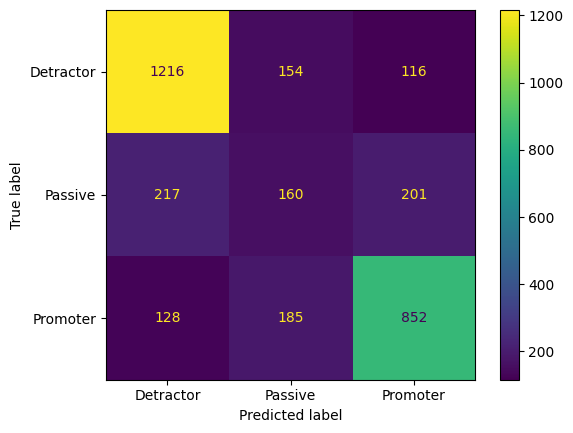

In [ ]:
cm = confusion_matrix(y_test_3, y_pred_mlp_3) # define a confusion matrix on the result
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelMLP.classes_)
disp.plot()

###b. Perform an evaluation with precision/recall measures on testing

The performance will be evaluated by precision/recall and the micro and macro average on precision/recall.

<img src="https://classeval.files.wordpress.com/2015/06/evaluation-measures-for-precision-recall.png?w=460"></img>

Source: https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/

Precision is the total number of times the system makes a true positives (predict `A` when the actual is `A`) divide by the total amount of times the system predicted `A`(no matter correct or wrong).

Recall is the total number of times the system makes a true positives (predict `A` when the actual is `A`) divide by the total amount of times the system predicted `A` correctly plus the times the system should predict `A`(predict negative on positive).



\begin{equation}
\text{Precision}_{Ci} = \frac{\text{True Positives}_{Ci}}{\text{True Positives}_{Ci} + \text{False Positives}_{Ci}}
\end{equation}

\begin{equation}
\text{Recall}_{Ci} = \frac{\text{True Positives}_{C}}{\text{True Positives}_{Ci} + \text{False Negatives}_{Ci}}
\end{equation}


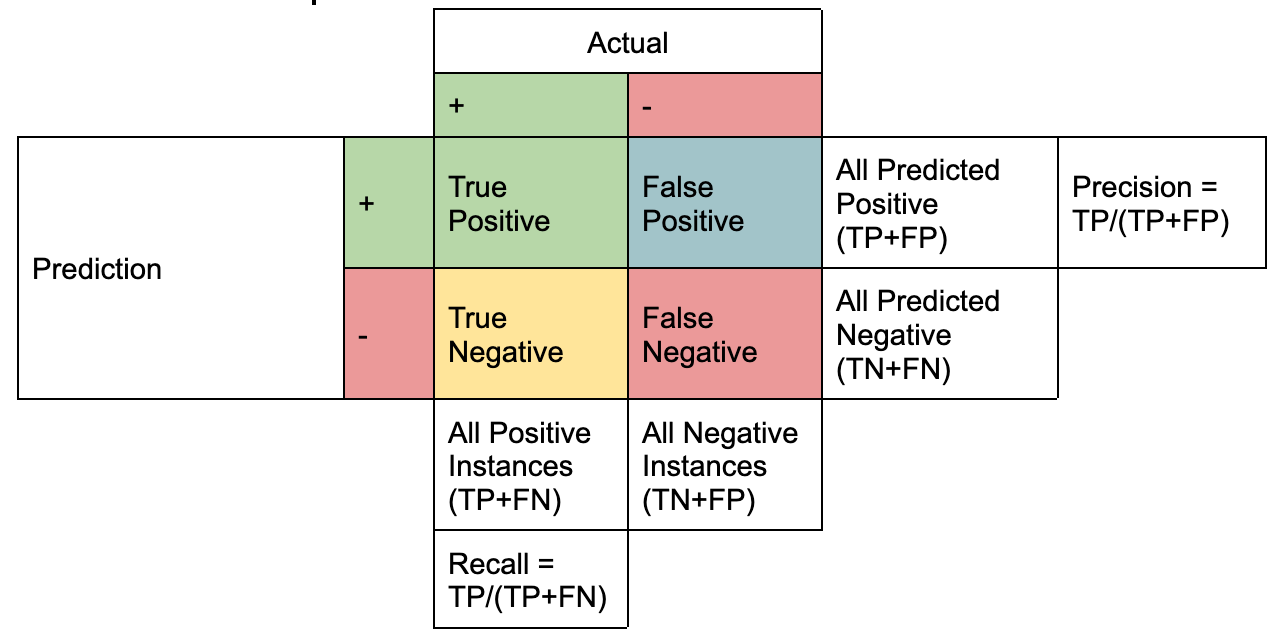

<footnote>Source: https://www.datacamp.com/tutorial/precision-recall-curve-tutorial</footnote>

Recall that Micro-average is average when putting all the data together, which is the sum of TP for each class divided by the sum of TP and FP/FN.


\begin{equation}
\text{Micro-Averaged Precision} = \frac{\sum_{i=1}^{N} \text{True Positives}_{Ci}}{\sum_{i=1}^{N} (\text{True Positives}_{Ci} + \text{False Positives}_{Ci})}
\end{equation}

\begin{equation}
\text{Micro-Averaged Recall} = \frac{\sum_{i=1}^{N} \text{True Positives}_{Ci}}{\sum_{i=1}^{N} (\text{True Positives}_{Ci} + \text{False Negatives}_{Ci})}
\end{equation}


Macro-average, the average on the results per class, which is summing all the pre class precisions/recalls and divided by the total number of classes.

\begin{equation}
\text{Macro-Averaged Precision} = \frac{1}{N} \sum_{i=1}^{N} \text{Precision}_{Ci}
\end{equation}

\begin{equation}
\text{Macro-Averaged Recall} = \frac{1}{N} \sum_{i=1}^{N} \text{Recall}_{Ci}
\end{equation}


\begin{align*}
N & : \text{Number of classes}
\end{align*}






In [ ]:
def precisions_recall_table(y_pred_1, y_pred_2, y_pred_3):
  '''
  Define a precisions recall table generator
  '''
  precisions_lr_1 = precision_score(y_test_1, y_pred_1, average=None)
  precisions_lr_2 = precision_score(y_test_2, y_pred_2, average=None)
  precisions_lr_3 = precision_score(y_test_3, y_pred_3, average=None)

  precisions_array= [precisions_lr_1, precisions_lr_2, precisions_lr_3]

  recall_lr_1 = recall_score(y_test_1, y_pred_1, average=None)
  recall_lr_2 = recall_score(y_test_2, y_pred_2, average=None)
  recall_lr_3 = recall_score(y_test_3, y_pred_3, average=None)

  recall_array= [recall_lr_1, recall_lr_2, recall_lr_3]

  # Define class labels and categories
  index_labels = ['Ordinal data', 'Derived-Dataset-1', 'Derived-Dataset-2']
  class_labels = ['Detractor', 'Passive', 'Promoter']
  categories = ['Precision', 'Recall']

  # Create a multi-index for columns
  columns = pd.MultiIndex.from_product([class_labels, categories], names=['Class', 'Metric'])

  # Initialize an empty DataFrame
  result_lr = pd.DataFrame(index = index_labels, columns=columns)

  for i in range(len(index_labels)):
    list_p = precisions_array[i]
    list_r = recall_array[i]
    for j in range(len(class_labels)):
      p = list_p[j]
      # [dataset, (class, precision/recall)]
      result_lr.loc[index_labels[i], (class_labels[j], categories[0])] = p

      r = list_r[j]
      result_lr.loc[index_labels[i], (class_labels[j], categories[1])] = r

  return result_lr

In [ ]:
def maco_micro_precisions_recall_table(y_pred_1, y_pred_2, y_pred_3):

  '''
  Define a maco_micro precisions recall table generator
  '''
  precisions_micro_1 = precision_score(y_test_1, y_pred_1, average='micro')
  precisions_micro_2 = precision_score(y_test_2, y_pred_2, average='micro')
  precisions_micro_3 = precision_score(y_test_3, y_pred_3, average='micro')

  precisions_micro_array= [precisions_micro_1, precisions_micro_1, precisions_micro_1]

  precisions_macro_1 = precision_score(y_test_1, y_pred_1, average='macro')
  precisions_macro_2 = precision_score(y_test_2, y_pred_2, average='macro')
  precisions_macro_3 = precision_score(y_test_3, y_pred_3, average='macro')

  precisions_macro_array= [precisions_macro_1, precisions_macro_2, precisions_macro_3]



  recall_micro_1 = recall_score(y_test_1, y_pred_1, average='micro')
  recall_micro_2 = recall_score(y_test_2, y_pred_2, average='micro')
  recall_micro_3 = recall_score(y_test_3, y_pred_3, average='micro')

  recall_micro_array= [recall_micro_1, recall_micro_2, recall_micro_3]

  recall_macro_1 = recall_score(y_test_1, y_pred_1, average='macro')
  recall_macro_2 = recall_score(y_test_2, y_pred_2, average='macro')
  recall_macro_3 = recall_score(y_test_3, y_pred_3, average='macro')

  recall_macro_array= [recall_macro_1, recall_macro_2, recall_macro_3]

  # Define class labels and categories
  index_labels = ['Ordinal data', 'Derived-Dataset-1', 'Derived-Dataset-2']
  pr_labels = ['Precision', 'Recall']
  categories = ['Macro-Averaged', 'Micro-Averaged']

  # Create a multi-index for columns
  columns = pd.MultiIndex.from_product([pr_labels, categories], names=['Class', 'Metric'])

  # Initialize an empty DataFrame
  result_lr = pd.DataFrame(index = index_labels, columns=columns)

  for i in range(len(index_labels)):
    p_micro = precisions_micro_array[i]
    r_micro = recall_micro_array[i]

    p_macro = precisions_macro_array[i]
    r_macro = recall_macro_array[i]

    # [dataset, (precision/recall, macro/micro)]
    result_lr.loc[index_labels[i], (pr_labels[0], categories[0])] = p_macro

    result_lr.loc[index_labels[i], (pr_labels[0], categories[1])] = p_micro

    result_lr.loc[index_labels[i], (pr_labels[1], categories[0])] = r_macro

    result_lr.loc[index_labels[i], (pr_labels[1], categories[1])] = r_micro

  return result_lr

In [ ]:
result_lr_pre_rec = precisions_recall_table(y_pred_lr_1, y_pred_lr_2, y_pred_lr_3)
result_mlp_pre_rec = precisions_recall_table(y_pred_mlp_1, y_pred_mlp_2, y_pred_mlp_3)

In [ ]:
result_lr_maco_micro = maco_micro_precisions_recall_table(y_pred_lr_1, y_pred_lr_2, y_pred_lr_3)
result_mlp_maco_micro = maco_micro_precisions_recall_table(y_pred_mlp_1, y_pred_mlp_2, y_pred_mlp_3)



```

```



##**Precision and Recall**

In [ ]:
result_lr_pre_rec # LR

Class             Detractor             Passive            Promoter          
Metric            Precision    Recall Precision    Recall Precision    Recall
Ordinal data       0.828349  0.932032  0.531915   0.17301  0.760409  0.893562
Derived-Dataset-1  0.824926  0.935397  0.572165  0.192042  0.771852  0.894421
Derived-Dataset-2  0.799765  0.916555  0.452632  0.148789  0.759731  0.871245

In [ ]:
result_mlp_pre_rec # MLP

Class             Detractor             Passive            Promoter          
Metric            Precision    Recall Precision    Recall Precision    Recall
Ordinal data       0.827307  0.893001  0.435323  0.302768  0.791496  0.830901
Derived-Dataset-1  0.802493  0.823015  0.357285  0.309689  0.760797  0.786266
Derived-Dataset-2  0.778988  0.818304  0.320641  0.276817  0.728828   0.73133

In [ ]:
data['NPS Score'].value_counts()

Detractor    4891
Promoter     4027
Passive      1843
Name: NPS Score, dtype: int64

In [ ]:
series = pd.Series(y_1)
series.value_counts()

Detractor    3405
Promoter     2862
Passive      1265
dtype: int64

Both models are facing problems with predicting the "Passive" class and obtaining a low recall rate, that means when ever the model make a prediction of "Passive" class, it's highly chance it was wrong. For the Passive class, the MLP model generally performs better recall rate than the LR model, while the LR model better on the precision. To investigate why the both model performs poorly for the "Passive" class, we observed that the distribution of the "Passive" class our dataset only contribute 17%.


## Micro/Macro Precision and Recall

In [ ]:
result_lr_maco_micro # Logistic Regression

Class                  Precision                        Recall               
Metric            Macro-Averaged Micro-Averaged Macro-Averaged Micro-Averaged
Ordinal data            0.706891       0.782286       0.666202       0.782286
Derived-Dataset-1       0.722981       0.782286       0.673953        0.78755
Derived-Dataset-2       0.670709       0.782286       0.645529       0.762775

In [ ]:
result_mlp_maco_micro # MLP

Class                  Precision                        Recall               
Metric            Macro-Averaged Micro-Averaged Macro-Averaged Micro-Averaged
Ordinal data            0.684709       0.764943       0.675557       0.764943
Derived-Dataset-1       0.640192       0.764943       0.639656       0.717869
Derived-Dataset-2       0.609486       0.764943       0.608817       0.689997

In the case of LR and MLP, both micro-averages are much higher than the macro-average. The reason for this is that the micro-average provides us with the overall accuracy performance. The precision/recall rate for the "Detractor" class is very high. Therefore, if the model performs well on the "Detractor" class, it will pull up the overall average as it contributes to most of the samples. It can be seen that the recall rates for Passive class are very low for LR. If we only consider the micro-average, we might overestimate our model's performance for LR, as it contributes a small amount to the calculation.

We can see that our training set has an imbalanced class distribution, where "Passive" only count around 17% of the total training samples.
We saw that macro averages will weighted **each class** equally, regardless of their frequency or size. Therefore, it is more sensitive to the performance, which each class contribute 1/3 of the performance while the classe only weight around 17% of the total samples.

Micro-average, on the other hand, gives equal weight to each sample in a dataset. It is calculated by summing the values for each class and dividing it by the total number of instances. In other words, it takes into account the performance of each class equally and treats them as a single entity. Therefore, it is less sensitive to the performance, which
it considers the overall performance of each sample so the ones that have a bad performance only contribute around 17% of the total samples.



In our case of evaluation, we want to focus more on the preference for each class. For example, if the model is good at predicting the first 100 samples of one class and the rest of the data samples are just similar to the first 100 samples, then we might not consider them since the overall prediction will be the same. As a result, we will overestimate the performance.

Macro-average, in our imbalanced distribution of classes, will give a better performance result as it ensures that each class contributes equally to the overall average.

##4.Modify some parameters, and perform a train/test/evaluate again

### Model 1

* hidden_layer_sizes : (250, 100)
      The ith element represents the number of neurons in the ith hidden layer.

* activation : 'relu'
      ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

* learning_rate : 'adaptive'
        'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.


* max_iter : int, default=1000
        Maximum number of iterations. The solver iterates until convergence
        (determined by 'tol') or this number of iterations. For stochastic
        solvers ('sgd', 'adam'), note that this determines the number of epochs
        (how many times each data point will be used), not the number of
        gradient steps.


* early_stopping : True
      Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. The split is stratified, except in a multilabel setting. If early stopping is False, then the training stops when the training loss does not improve by more than tol for n_iter_no_change consecutive passes over the training set. Only effective when solver=’sgd’ or ‘adam’.




MLPClassifier(hidden_layer_sizes = (250,100), activation = 'relu', solver = 'adam', max_iter=1000, learning_rate = 'adaptive')

In [ ]:
ModelMLP1 = MLPClassifier(
    hidden_layer_sizes = (250, 100),
    activation = 'relu',
    solver = 'adam',
    max_iter=1000,
    learning_rate = 'adaptive',
    early_stopping = True
  )

**Original dataset**

***Training***

In [ ]:
ave_accuracy_mlp1_1 = train(ModelMLP1, X_1, y_1) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_mlp1_1) # print average accuracy

Average accuracy: 0.757036643653744


***Testing***

In [ ]:
y_pred_mlp1_1 = ModelMLP1.predict(X_test_1) # evaluate the model using test set
accuracy_mlp1 = accuracy_score(y_test_1, y_pred_mlp1_1) # the overall accuracy score on test set
accuracy_mlp1

0.7720656550015484

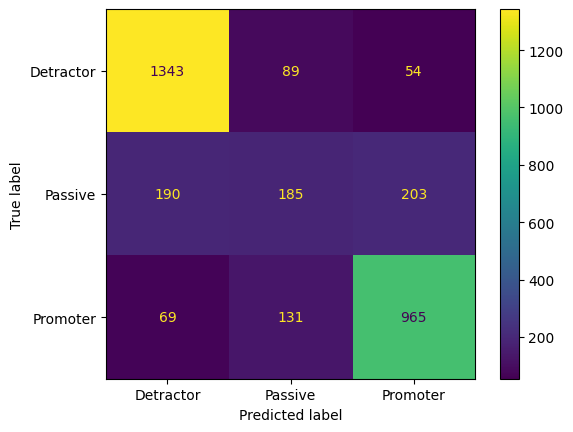

In [ ]:
cm = confusion_matrix(y_test_1, y_pred_mlp1_1) # define a confusion matrix on the result
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelMLP1.classes_)
disp.plot()



```

```



**Derived-Dataset-1**

***Training***

In [ ]:
ave_accuracy_mlp1_2 = train(ModelMLP1, X_2, y_2) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_mlp1_2) # print average accuracy

Average accuracy: 0.7606047530536377


***Testing***

In [ ]:
y_pred_mlp1_2 = ModelMLP1.predict(X_test_2) # evaluate the model using test set
accuracy_mlp_2 = accuracy_score(y_test_2, y_pred_mlp1_2) # the overall accuracy score on test set
accuracy_mlp_2

0.7934344998451534

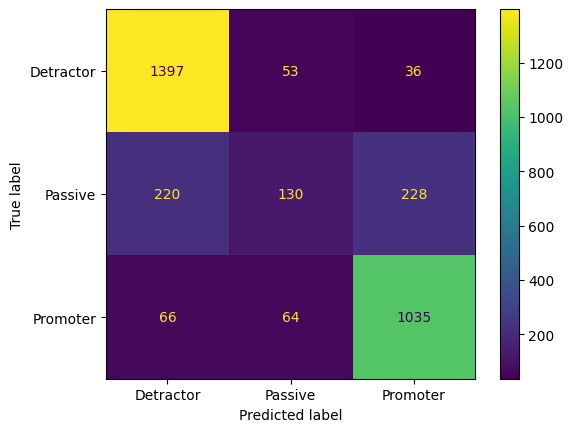

In [ ]:
cm = confusion_matrix(y_test_2, y_pred_mlp1_2) # define a confusion matrix on the result
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelMLP.classes_)
disp.plot()



```
```



**Derived-Dataset-2**

***Training***

In [ ]:
ave_accuracy_mlp1_3 = train(ModelMLP1, X_3, y_3) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_mlp1_3) # print average accuracy

Average accuracy: 0.7608131232666548


***Testing***

In [ ]:
y_pred_mlp1_3 = ModelMLP1.predict(X_test_3) # evaluate the model using test set

In [ ]:
accuracy_mlp1_3 = accuracy_score(y_test_3, y_pred_mlp1_3) # the overall accuracy score on test set
accuracy_mlp1_3

0.7565809848250232

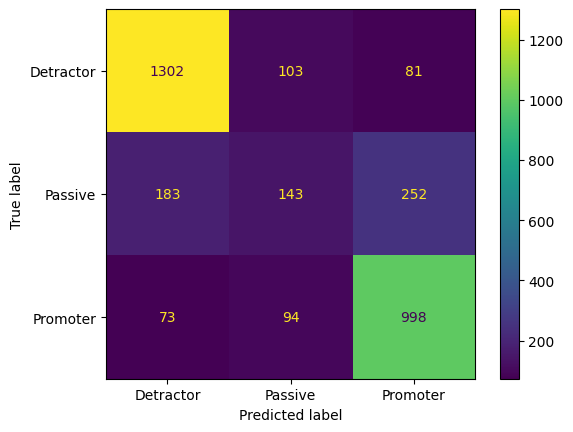

In [ ]:
cm = confusion_matrix(y_test_3, y_pred_mlp1_3) # define a confusion matrix on the result
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelMLP1.classes_)
disp.plot()

In [ ]:
result_mlp1_pre_rec = precisions_recall_table(y_pred_mlp1_1, y_pred_mlp1_2, y_pred_mlp1_3)
result_mlp1_maco_micro = maco_micro_precisions_recall_table(y_pred_mlp1_1, y_pred_mlp1_2, y_pred_mlp1_3)

### Model 2

* hidden_layer_sizes : (300, 200, 150)
      The ith element represents the number of neurons in the ith hidden layer.

* activation : 'logistic'
      the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

* solver : 'sgd'

      'sgd' refers to stochastic gradient descent.

* learning_rate : 'adaptive'
      ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.



* learning_rate_init : 0.01
      The initial learning rate used. It controls the step-size in updating the weights. Only used when solver='sgd' or 'adam'.

* early_stopping : True
      Whether to use early stopping to terminate training when validation score is not improving. If set to true, it will automatically set aside 10% of training data as validation and terminate training when validation score is not improving by at least tol for n_iter_no_change consecutive epochs. The split is stratified, except in a multilabel setting. If early stopping is False, then the training stops when the training loss does not improve by more than tol for n_iter_no_change consecutive passes over the training set. Only effective when solver=’sgd’ or ‘adam’.

In [ ]:
ModelMLP2 = MLPClassifier(
    hidden_layer_sizes = (300, 200, 150),
    activation = 'logistic',
    solver = 'sgd',
    max_iter = 1000,
    learning_rate = 'adaptive',
    learning_rate_init=0.01,
    early_stopping = True
  )



```

```



**Original dataset**

***Training***

In [ ]:
ave_accuracy_mlp2_1 = train(ModelMLP2, X_1, y_1) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_mlp2_1) # print average accuracy

Average accuracy: 0.6248921269251191


***Testing***

In [ ]:
y_pred_mlp2_1 = ModelMLP2.predict(X_test_1) # evaluate the model using test set
accuracy_mlp2_1 = accuracy_score(y_test_1, y_pred_mlp2_1) # the overall accuracy score on test set
accuracy_mlp2_1

0.46020439764633014

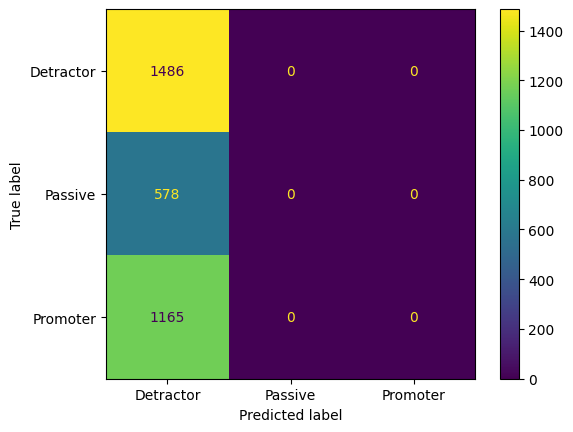

In [ ]:
cm = confusion_matrix( y_test_1, y_pred_mlp2_1) # define a confusion matrix on the result
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelMLP2.classes_)
disp.plot()



```
```



**Derived-Dataset-1**

***Training***

In [ ]:
ave_accuracy_mlp2_2 = train(ModelMLP2, X_2, y_2) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_mlp2_2) # print average accuracy

Average accuracy: 0.6147261878729182


***Testing***

In [ ]:
y_pred_mlp2_2 = ModelMLP2.predict(X_test_2) # evaluate the model using test set
accuracy_mlp2_2 = accuracy_score(y_test_2, y_pred_mlp2_2) # the overall accuracy score on test set
accuracy_mlp2_2

0.46020439764633014

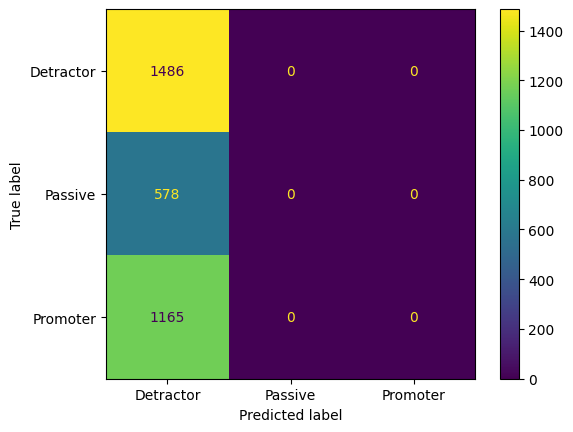

In [ ]:
cm = confusion_matrix(y_test_2, y_pred_mlp2_2) # define a confusion matrix on the result
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelMLP2.classes_)
disp.plot()



```
```



**Derived-Dataset-2**

***Training***

In [ ]:
ave_accuracy_mlp2_3 = train(ModelMLP2, X_3, y_3) # train the model using 4-fold
print("Average accuracy:", ave_accuracy_mlp2_3) # print average accuracy

Average accuracy: 0.6056897976042952


***Testing***

In [ ]:
y_pred_mlp2_3 = ModelMLP2.predict(X_test_3) # evaluate the model using test set

In [ ]:
accuracy_mlp2_3 = accuracy_score(y_test_3, y_pred_mlp2_3) # the overall accuracy score on test set
accuracy_mlp2_3

0.46020439764633014

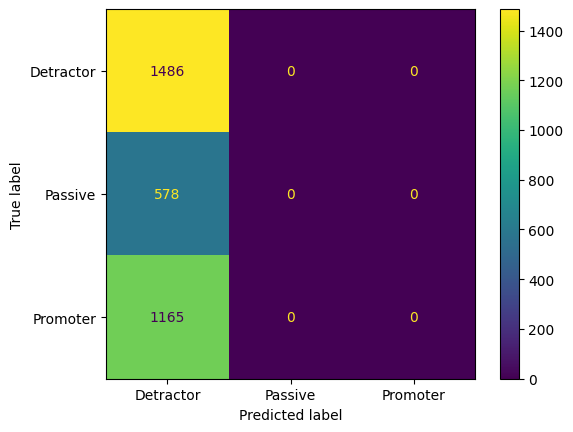

In [ ]:
cm = confusion_matrix(y_test_3, y_pred_mlp2_3) # define a confusion matrix on the result
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelMLP2.classes_)
disp.plot()

In [ ]:
result_mlp2_pre_rec = precisions_recall_table(y_pred_mlp2_1, y_pred_mlp2_2, y_pred_mlp2_3)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
result_mlp2_maco_micro = maco_micro_precisions_recall_table(y_pred_mlp2_1, y_pred_mlp2_2, y_pred_mlp2_3)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5.Analyze the obtained results


###Precision and Recall

In [ ]:
result_lr_pre_rec #LR

Class             Detractor             Passive            Promoter          
Metric            Precision    Recall Precision    Recall Precision    Recall
Ordinal data       0.828349  0.932032  0.531915   0.17301  0.760409  0.893562
Derived-Dataset-1  0.824926  0.935397  0.572165  0.192042  0.771852  0.894421
Derived-Dataset-2  0.799765  0.916555  0.452632  0.148789  0.759731  0.871245

In [ ]:
result_mlp_pre_rec #MLP

Class             Detractor             Passive            Promoter          
Metric            Precision    Recall Precision    Recall Precision    Recall
Ordinal data       0.827307  0.893001  0.435323  0.302768  0.791496  0.830901
Derived-Dataset-1  0.802493  0.823015  0.357285  0.309689  0.760797  0.786266
Derived-Dataset-2  0.778988  0.818304  0.320641  0.276817  0.728828   0.73133

In [ ]:
result_mlp1_pre_rec #MLP1

Class             Detractor             Passive            Promoter          
Metric            Precision    Recall Precision    Recall Precision    Recall
Ordinal data       0.838327  0.903769   0.45679  0.320069  0.789689  0.828326
Derived-Dataset-1  0.830065  0.940108  0.526316  0.224913  0.796767  0.888412
Derived-Dataset-2  0.835687  0.876178  0.420588  0.247405  0.749812  0.856652

In [ ]:
result_mlp2_pre_rec #MLP2

Class             Detractor          Passive         Promoter       
Metric            Precision Recall Precision Recall Precision Recall
Ordinal data       0.460204    1.0       0.0    0.0       0.0    0.0
Derived-Dataset-1  0.460204    1.0       0.0    0.0       0.0    0.0
Derived-Dataset-2  0.460204    1.0       0.0    0.0       0.0    0.0

The precision/recall result on dataset **Ordinal data** preforms the better over all dataset. This is not surprised since the **Ordinal data** contains all the POS and NE, where it should proved a more detailed relationship with the appearance of words with its class. However, **Derived-Dataset-1** and **Derived-Dataset-2** still provide a petty close result as **Ordinal data**, meaning that we included all the important POS and NE that need to identify the classes.

An interesting result on MLP2 is that it only makes true positive and false negative on "Detractor" class. Recall is 1.0, suggesting that the model is capturing all instances of the Detractor class, while Precision and Recall for both Passive and Promoter classes are 0.0, indicating that the model is not predicting these classes at all.


<img src="https://qph.cf2.quoracdn.net/main-qimg-d17b12af1819ef6ad6690e705664542e-pjlq">

Scourse: https://www.quora.com/When-should-we-use-logistic-regression-and-Neural-Network


<img src = "https://miro.medium.com/v2/resize:fit:1200/1*1GzbXFVtZzFuIiTA9hazuw.png">

In [ ]:
probabilities = ModelMLP2.predict_proba(X_test_3)

In [ ]:
print("Softmax Predicted Probabilities:")
print(probabilities[:5])

Predicted Probabilities:
[[0.49530001 0.15427504 0.35042495]
 [0.49528785 0.1542901  0.35042205]
 [0.49529613 0.154285   0.35041888]
 [0.49530822 0.15427278 0.35041901]
 [0.49528126 0.15430492 0.35041382]]


If we check the softmax output for the ModelMLP2, we can observe that the class "Detractor" always have the highest percentage. The probabilities over the first 5 are quite close, indicating that the model is somewhat uncertain in its predictions.

Another interesting observation is that the distribution of the probabilities is very close to the distribution of the classes. With our imbalanced dataset, the model has a high bias towards the majority class. If we try to visualization of activation functions on our "toy" version of MLP2, we can observe that the loss for logistic (sigmoid) activation function is very high over a long period (epoch). Therefore, the logistic activation function might not be the best choice for our particular classification problem, and we will not consider MLP2 for the rest of the evaluation.

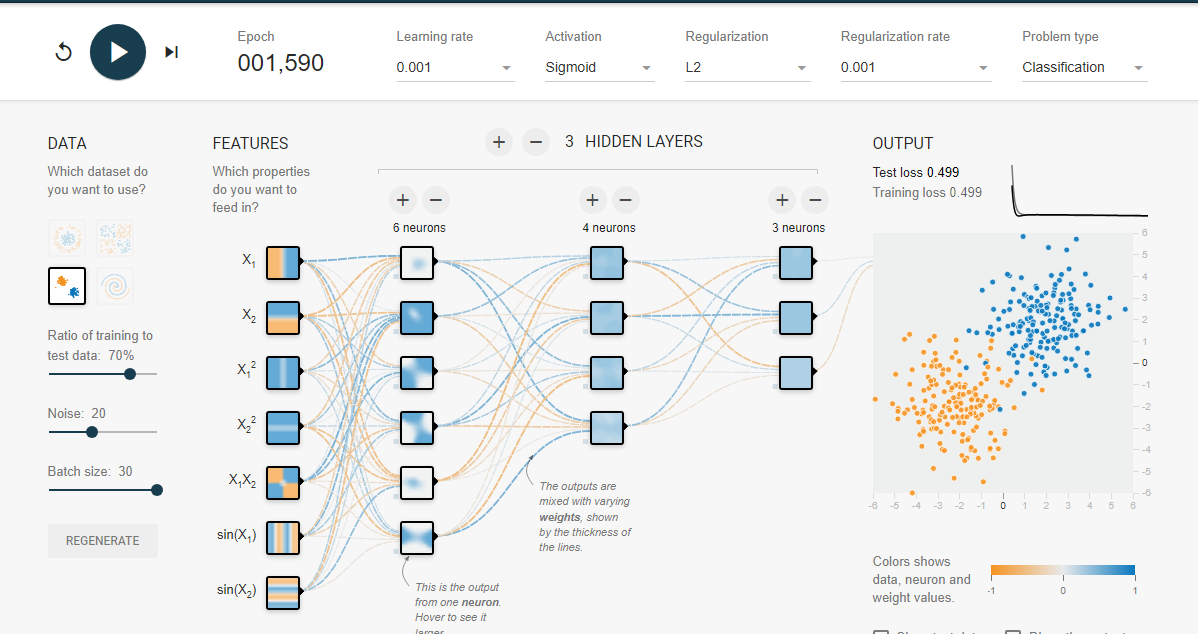

Source: https://github.com/tensorflow/playground

The precision and recall scores for the "Detractor" and "Promoter" class show excellent results for LR, MLP, and MLP1, which could be attributed to the larger number of training samples for this class. However, the recall score is higher than the precision score, indicating that the models are quite good at identifying instances of the "Detractor" and "Promoter" classes but they also generate a significant number of false positive predictions for it. This might be because the features used for identifying the "Detractor" and "Promoter" classes are not specific enough and have some similarity. As a result, the models make more true positive predictions on the "Detractor" and "Promoter" classes than they should, leading to a lower precision score.

On the other hand, when it comes to identifying the "Passive" class, the models show a higher of precision than the recall. This suggests that the models can correctly identify instances of the "Passive" class (true positive), but they also miss many instances of it (false negative). This imbalance in the prediction can result in the models over-predicting one class and under-predicting another.

One possible explanation for this is the lack of training data for the "Passive" class. Although the models have learned from the other classes, they don't have enough data to accurately distinguish and classify the "Passive" class. It is also possible that there is a common feature used to classify "Passive" and the other classes, which leads to the models favoring one class over the other. Another possible is the accuracy of the annotated classes.

**Data annotated accuracy**

Review 1
> Nakhchivan to Istanbul. The flight set off a **little bit late** and boarding was **disorderly** with too many passengers carrying oversized baggage on board. The aircraft appeared to be old with drop-down screens for entertainment which were virtually useless. **Cabin service was not very good and staff appeared not to care.** - *Passive*

In this review, it mentioned that the flight departure was delayed and the quality of cabin service is described as not very good, suggesting staff is said to appear not to care, indicating a lack of attentiveness or responsiveness to passenger needs.
The passenger's perception of the staff as indifferent further contributes to the overall negative assessment of the flight. However, this review was classified as "Passive."


Review 2
> " Dalaman to Istanbul. Well, the seat was **okay**. The food was just a sandwich and it **wasn't really fresh**. Cabin crew was **nice and friendly**. Drinks are standard. The pilot's **announcements were not understandable** (almost every pilot at Turkish Airlines can't speak English clearly, I don't know what kind of exam they pass)." - *Promoter*

This review is more balanced, acknowledging positive aspects such as friendly cabin crew while expressing dissatisfaction with the food quality and difficulty in understanding pilot announcements. The humorous comment adds a lighter tone to the overall feedback, but this review was labeled as "Promoter."

Review 3
> "  A return flight from Manchester to Bucharest via Munich with first ticket simple economy, and the second full economy (paid more because was expecting some difficulties with my family and needed to be able to cancel the ticket). Used the first ticket successfully. On the second ticket **re-booked 3 times** (because of rebooking paid additional 100GBP). In the end understood I'll not be able to make it so asked the refund for the return ticket. Was told that I'll receive my money in 2 weeks. After 2 weeks was told to wait for another week. After that week was told that I should've bought both tickets with economy full in order to be able to get a refund. I bought the return ticket specifically more expensive to be able to cancel it. That's **unacceptable**." - *Passive*

This review mostly represent frustrating experience with the refund process, highlighting the discrepancy in information provided initially and the subsequent denial of a refund due to the ticket type purchased. The tone mostly express the  dissatisfaction with the handling of the flight booking situation, while it was labeled as "Passive."

It is apparent that there is inconsistency among different annotations and reviews. One annotator or reviewer may categorize the semantics in a review as belonging to a certain class, while another may categorize it differently. This inconsistency can also be learned by the model, which can lead to errors in prediction. For example, if a review contains negative words, but the model has been trained to associate this feature with the "Passive" class, it may incorrectly predict the review as "Passive" when it should be classified as "Detractor." This highlights the importance of ensuring consistency in annotations and reviews to prevent confusion and errors in the model's predictions.

The present inquiry entails an examination of the model's confusion matrices on diverse datasets. Looking at all the confusion matrices of the model on different datasets, we can observe that the LR model's performance is not satisfactory. For instance, when we consider the results of the LR model on derived dataset 1, we notice that the number of predictions made by the model on "Passive" is similar when the true value is "Detractor" or "Promoter". Hence, the LR model is unable to provide a robust classification of the "Passive" class and fails to identify its underlying patterns. This lack of precision in the LR model's predictive capacity underscores the need for further analysis and refinement of the model's methodology.

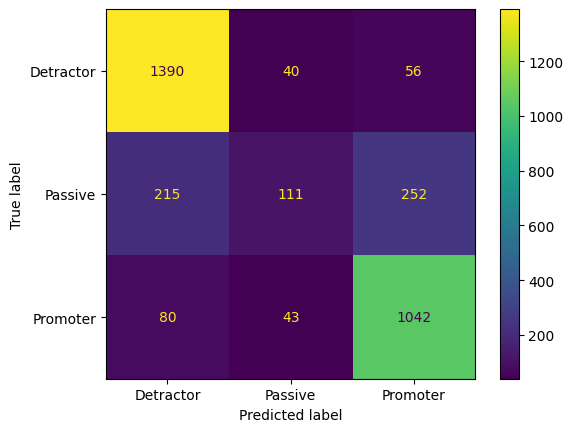

In [ ]:
cm = confusion_matrix(y_test_2, y_pred_lr_2) # define a confusion matrix on the result
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelLR.classes_)
disp.plot()

For a more complex model, like MLP, it captures both intricate patterns, making more true positives on the "Passive" class. It does have a more true positive on the "Passive" class, but this learning leads to a higher result of false negative on the "Detractor" and "Promoter" class, which results in a lower overall recall rate than the LR model.

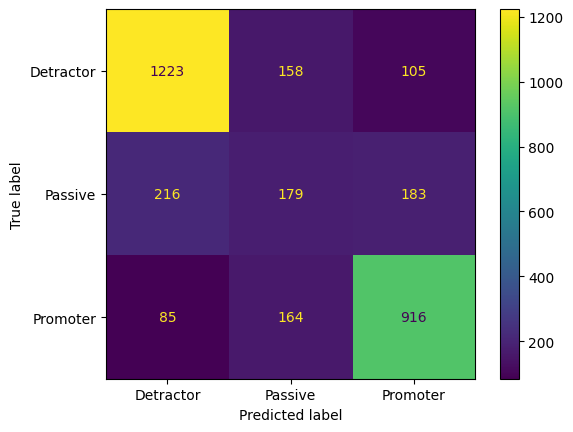

In [ ]:
cm = confusion_matrix(y_test_2, y_pred_mlp_2) # define a confusion matrix on the result
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ModelMLP.classes_)
disp.plot()

###Macro-Averaged	and Micro-Averaged

In [ ]:
result_lr_maco_micro #LR

Class                  Precision                        Recall               
Metric            Macro-Averaged Micro-Averaged Macro-Averaged Micro-Averaged
Ordinal data            0.706891       0.782286       0.666202       0.782286
Derived-Dataset-1       0.722981       0.782286       0.673953        0.78755
Derived-Dataset-2       0.670709       0.782286       0.645529       0.762775

In [ ]:
result_mlp_maco_micro #MLP

Class                  Precision                        Recall               
Metric            Macro-Averaged Micro-Averaged Macro-Averaged Micro-Averaged
Ordinal data            0.684709       0.764943       0.675557       0.764943
Derived-Dataset-1       0.640192       0.764943       0.639656       0.717869
Derived-Dataset-2       0.609486       0.764943       0.608817       0.689997

In [ ]:
result_mlp1_maco_micro #MLP1

Class                  Precision                        Recall               
Metric            Macro-Averaged Micro-Averaged Macro-Averaged Micro-Averaged
Ordinal data            0.694935       0.772066       0.684055       0.772066
Derived-Dataset-1       0.717716       0.772066       0.684478       0.793434
Derived-Dataset-2       0.668696       0.772066       0.660078       0.756581

In [ ]:
result_mlp2_maco_micro #MLP2

Class                  Precision                        Recall               
Metric            Macro-Averaged Micro-Averaged Macro-Averaged Micro-Averaged
Ordinal data            0.153401       0.460204       0.333333       0.460204
Derived-Dataset-1       0.153401       0.460204       0.333333       0.460204
Derived-Dataset-2       0.153401       0.460204       0.333333       0.460204

We discussed that when working with an imbalanced dataset, using macro-average evaluation provides a more comprehensive assessment. When comparing the precision/recall micro-average for LR, MLP, and MLP1, it appears that they perform similarly. However, upon further analysis, LR tends to make more true positive predictions on the majority class, resulting in a  lower recall rate for the minority class. In contrast, the macro-average for recall captures this drawback of LR.

Furthermore, after comparing different MLP models with varying classifier parameters, we found that MLP1 performed the best. When upon comparing the macro-average of the two potential models, LR tended to provide a similar results as MLP1. Because MLP1 can capture a more complex relation between input and output, our results suggest that using MLP1 as a discriminative classifier will yield the best classification performance in this NLP task.



#Reference

1. https://stackoverflow.com/questions/24282121/why-use-tanh-for-activation-function-of-mlp

1. https://www.dataknowsall.com/pos.html
1. https://www.hindawi.com/journals/sp/2021/5558918/

1. https://medium.com/@ekomasterwan993/analyzing-airlines-reviews-nlp-project-7a58b553c370

1. https://medium.com/civis-analytics/an-intro-to-natural-language-processing-in-python-framing-text-classification-in-familiar-terms-33778d1aa3ca

1. https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

2. https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/

3. https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b

2. https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141

2. https://towardsdatascience.com/latent-semantic-analysis-intuition-math-implementation-a194aff870f8

2. https://datascience.stackexchange.com/questions/39264/how-does-sigmoid-activation-work-in-multi-class-classification-problems

2. https://stats.stackexchange.com/questions/243588/how-to-apply-softmax-as-activation-function-in-multi-layer-perceptron-in-scikit

2. https://www.quora.com/When-should-we-use-logistic-regression-and-Neural-Network